# Logistic regression for multi-class classification

## import libraries

In [193]:
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

## load data

In [194]:
directory_data  = './data/'
filename_data   = 'assignment_05_data.npz'
data            = np.load(os.path.join(directory_data, filename_data))

x_train = data['x_train']
y_train = data['y_train']

x_test  = data['x_test']
y_test  = data['y_test']

num_data_train  = x_train.shape[0]
num_data_test   = x_test.shape[0]

print('*************************************************')
print('size of x_train :', x_train.shape)
print('size of y_train :', y_train.shape)
print('*************************************************')
print('size of x_test :', x_test.shape)
print('size of y_test :', y_test.shape)
print('*************************************************')
print('number of training image :', x_train.shape[0])
print('height of training image :', x_train.shape[1])
print('width of training image :', x_train.shape[2])
print('*************************************************')
print('number of testing image :', x_test.shape[0])
print('height of testing image :', x_test.shape[1])
print('width of testing image :', x_test.shape[2])
print('*************************************************')

*************************************************
size of x_train : (20000, 28, 28)
size of y_train : (20000, 10)
*************************************************
size of x_test : (8000, 28, 28)
size of y_test : (8000, 10)
*************************************************
number of training image : 20000
height of training image : 28
width of training image : 28
*************************************************
number of testing image : 8000
height of testing image : 28
width of testing image : 28
*************************************************


## number of classes

In [195]:
nClass = y_train.shape[1]

print('*************************************************')
print('number of classes :', nClass)
print('*************************************************')

*************************************************
number of classes : 10
*************************************************


## vectorize image data

In [196]:
vector_x_train  = x_train.reshape(x_train.shape[0], x_train.shape[1] * x_train.shape[2])
vector_x_test   = x_test.reshape(x_test.shape[0], x_test.shape[1] * x_test.shape[2])

print('*************************************************')
print('dimension of the training data :', vector_x_train.shape)
print('dimension of the testing data :', vector_x_test.shape)
print('*************************************************')
print('dimension of the training label :', y_train.shape)
print('dimension of the testing label :', y_test.shape)
print('*************************************************')

*************************************************
dimension of the training data : (20000, 784)
dimension of the testing data : (8000, 784)
*************************************************
dimension of the training label : (20000, 10)
dimension of the testing label : (8000, 10)
*************************************************


## index for each class

In [197]:
index_train = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}
index_test  = {0:[], 1:[], 2:[], 3:[], 4:[], 5:[], 6:[], 7:[], 8:[], 9:[]}

number_index_train  = np.zeros(nClass)
number_index_test   = np.zeros(nClass)

print('*************************************************')

for i in range(nClass):

    index_train[i]  = np.where(y_train[:, i] == 1)
    index_test[i]   = np.where(y_test[:, i] == 1)

    number_index_train[i]   = np.shape(index_train[i])[1]
    number_index_test[i]    = np.shape(index_test[i])[1]

    print('number of the training data for class %2d : %5d' % (i, number_index_train[i]))
    print('number of the testing data for class %2d : %5d' % (i, number_index_test[i]))

print('*************************************************')

*************************************************
number of the training data for class  0 :  2000
number of the testing data for class  0 :   800
number of the training data for class  1 :  2000
number of the testing data for class  1 :   800
number of the training data for class  2 :  2000
number of the testing data for class  2 :   800
number of the training data for class  3 :  2000
number of the testing data for class  3 :   800
number of the training data for class  4 :  2000
number of the testing data for class  4 :   800
number of the training data for class  5 :  2000
number of the testing data for class  5 :   800
number of the training data for class  6 :  2000
number of the testing data for class  6 :   800
number of the training data for class  7 :  2000
number of the testing data for class  7 :   800
number of the training data for class  8 :  2000
number of the testing data for class  8 :   800
number of the training data for class  9 :  2000
number of the testing data f

## plot data

In [198]:
def plot_data_grid(data, index_data, nRow, nCol):

    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [199]:
nRow    = 2
nCol    = 4
nPlot   = nRow * nCol

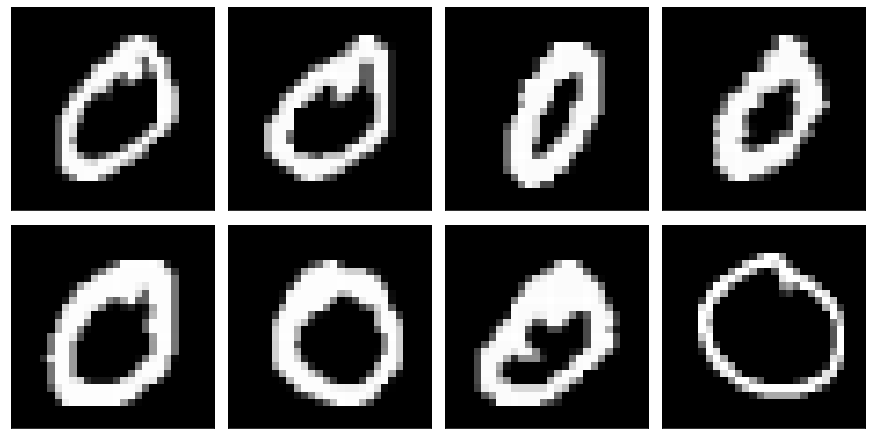

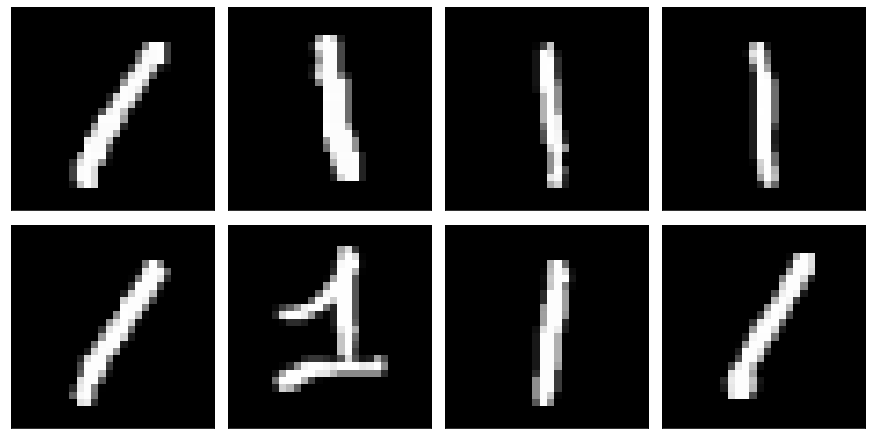

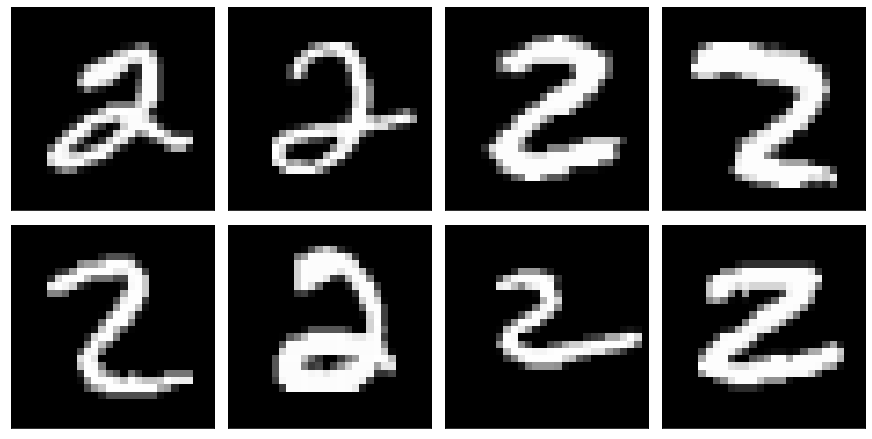

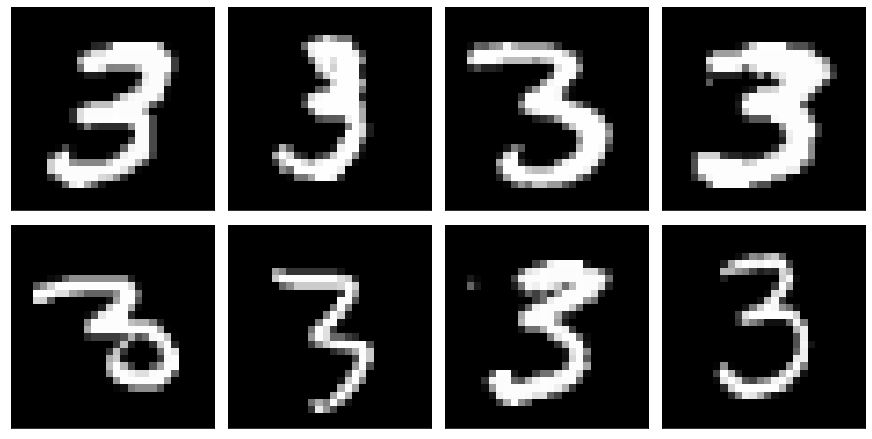

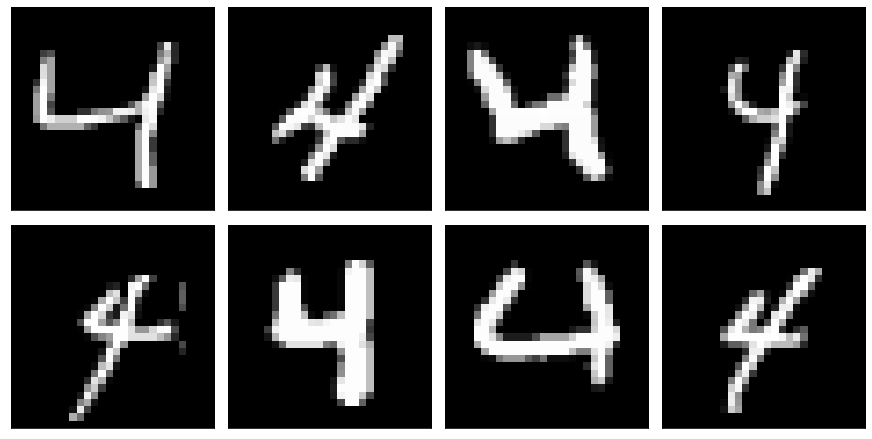

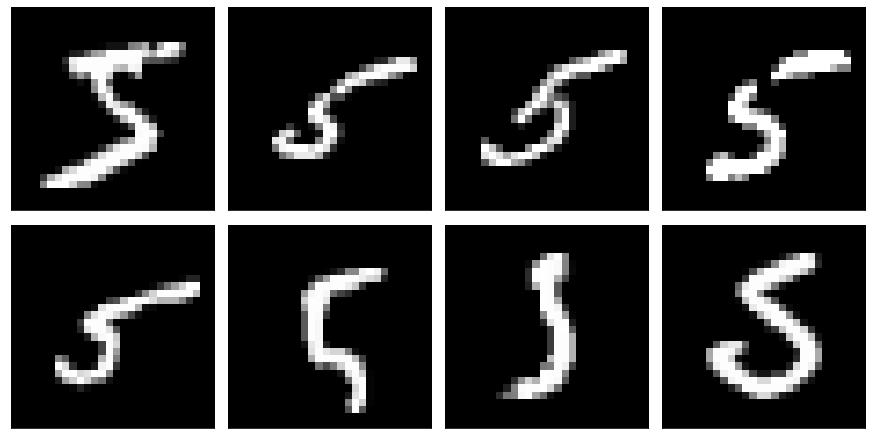

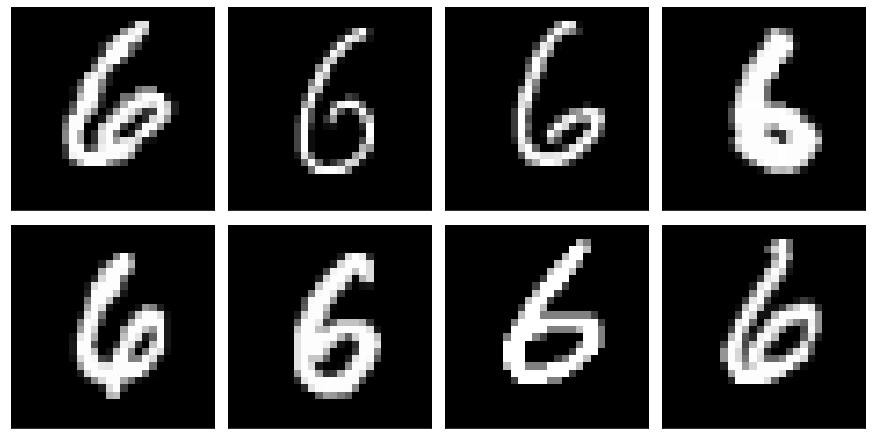

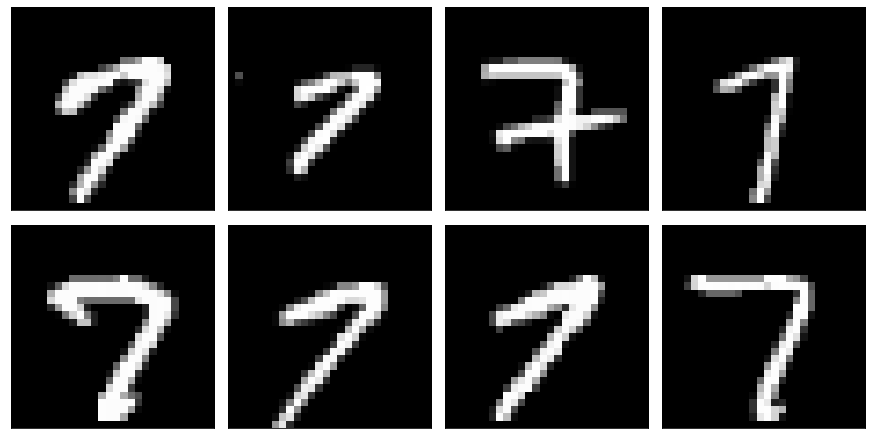

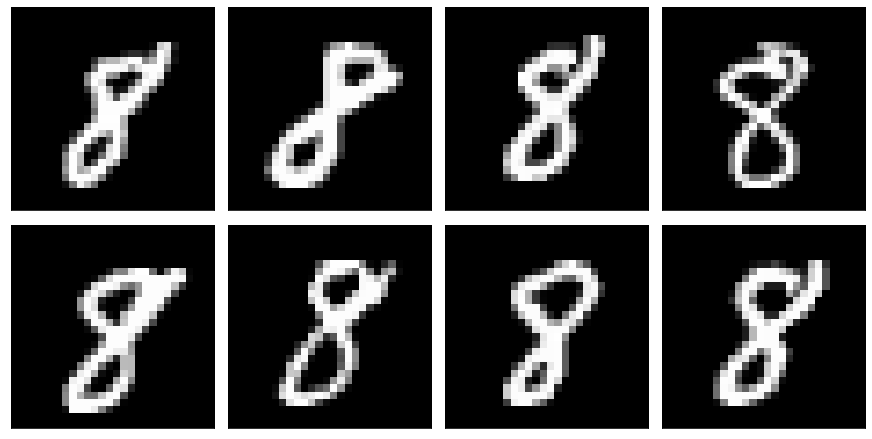

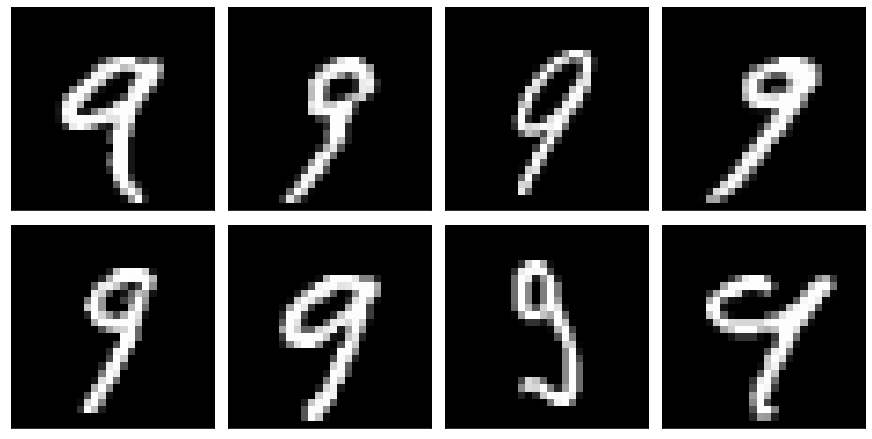

In [200]:
for i in range(nClass):

    index_class_plot = index_train[i][0][0:nPlot]
    plot_data_grid(x_train, index_class_plot, nRow, nCol)

## linear layer

In [201]:
def layer_linear(input, weight):

    output = np.dot(weight, input.T)

    return output

## Softmax function

In [202]:
def activation_softmax(input):

    output = np.exp(input) / np.sum(np.exp(input), axis = 0)[None,:]

    return output

## compute prediction by the forward propagation of the neural network

In [203]:
def compute_prediction(input, weight):

    prediction = activation_softmax(layer_linear(input, weight))

    return prediction

## compute loss for the cross-entropy term

In [204]:
def compute_loss_cross_entropy(prediction, label):
    
    loss = -np.mean(label * np.log(prediction.T))

    return loss

## compute loss for the regularization term

In [205]:
def compute_loss_regularization(alpha, weight):
    
    loss = alpha / 2 * np.sum((weight ** 2))

    return loss

## compute loss function

In [206]:
def compute_loss(prediction, label, alpha, weight):

    loss = compute_loss_cross_entropy(prediction, label) + compute_loss_regularization(alpha, weight)
    
    return loss

## compute gradient for the cross-entropy term

In [207]:
def compute_gradient_cross_entropy(input, prediction, label):

    gradient = (input.T)@(prediction.T - label)/input.shape[0]

    return gradient.T

## compute gradient for the regularization term

In [208]:
def compute_gradient_regularization(alpha, weight):
    
    gradient = alpha * weight

    return gradient

## compute gradient

In [209]:
def compute_gradient(input, prediction, label, alpha, weight):

    gradient = compute_gradient_cross_entropy(input, prediction, label) + compute_gradient_regularization(alpha, weight)

    return gradient

## compute accuracy

In [210]:
def compute_accuracy(prediction, label):

    bCorrect    = np.equal(np.argmax(prediction, axis=0),np.argmax(label, axis=1))
    accuracy    = np.sum(bCorrect) / len(prediction.T)
    
    return accuracy

## consider bias in the data

In [211]:
one_train   = np.ones([vector_x_train.shape[0],1])
one_test    = np.ones([vector_x_test.shape[0],1])

vector_x_train_bias = np.concatenate((vector_x_train, one_train), axis = 1)
vector_x_test_bias  = np.concatenate((vector_x_test, one_test), axis = 1)

print('dimension of the training data with bias :', vector_x_train_bias.shape)
print('dimension of the testing data with bias :', vector_x_test_bias.shape)

dimension of the training data with bias : (20000, 785)
dimension of the testing data with bias : (8000, 785)


## construct model parameters and initialize them

In [212]:
def get_weight(dim_input, dim_output):
    
    weight = np.zeros((dim_output, dim_input))
    # initialize the model parameters (linear = 0.001, bias = 1)
    weight[:,:dim_input-1] = 0.001
    weight[:,dim_input-1:] = 1

    return weight

In [213]:
dim_input   = vector_x_train_bias.shape[1]  #785
dim_output  = nClass                        #10

weight = get_weight(dim_input, dim_output)

print('dimension of the model parameters: ', weight.shape)
print('first row of the weight matrix: ', weight[0, :])

dimension of the model parameters:  (10, 785)
first row of the weight matrix:  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001
 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.

## hyper-parameters

In [214]:
number_iteration    = 1000
learning_rate       = 0.001

list_size_minibatch = [50, 100, 200]        #beta
list_weight_decay   = [0.001, 0.01, 0.1]    #alpha

num_size_minibatch  = len(list_size_minibatch)
num_weight_decay    = len(list_weight_decay)

## variables for optimization information for different minibatch

In [215]:
train_loss_mean_minibatch     = np.zeros((num_size_minibatch, number_iteration))
train_loss_std_minibatch      = np.zeros((num_size_minibatch, number_iteration))

train_accuracy_mean_minibatch = np.zeros((num_size_minibatch, number_iteration))
train_accuracy_std_minibatch  = np.zeros((num_size_minibatch, number_iteration))

test_loss_minibatch           = np.zeros((num_size_minibatch, number_iteration))
test_accuracy_minibatch       = np.zeros((num_size_minibatch, number_iteration))

## variables for optimization information for different weight decay

In [216]:
train_loss_mean_weight_decay        = np.zeros((num_weight_decay, number_iteration))
train_loss_std_weight_decay         = np.zeros((num_weight_decay, number_iteration))

train_accuracy_mean_weight_decay    = np.zeros((num_weight_decay, number_iteration))
train_accuracy_std_weight_decay     = np.zeros((num_weight_decay, number_iteration))

test_loss_weight_decay              = np.zeros((num_weight_decay, number_iteration))
test_accuracy_weight_decay          = np.zeros((num_weight_decay, number_iteration))

## stochastic gradient descent iterations with different mini-batch (with alpha = 0)

In [217]:
# iteration for mini-batch  
for k in range(num_size_minibatch):

    size_minibatch  = list_size_minibatch[k]
    num_minibatch   = int(vector_x_train.shape[0] / size_minibatch)
    alpha           = 0

    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))

    weight = get_weight(vector_x_train_bias.shape[1], nClass)
    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j*size_minibatch : (j+1)*size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient_cross_entropy(data, prediction, label)
            weight      = weight - learning_rate * gradient

            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, alpha, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_minibatch[k, i] = np.mean(loss_epoch)
        train_loss_std_minibatch[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_minibatch[k, i] = np.mean(accuracy_epoch)
        train_accuracy_std_minibatch[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, alpha, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_minibatch[k, i]       = loss_test
        test_accuracy_minibatch[k, i]   = accuracy_test

mini-batch size =  50, alpha = 0.000


100%|██████████| 1000/1000 [06:32<00:00,  2.54it/s]


mini-batch size = 100, alpha = 0.000


100%|██████████| 1000/1000 [05:17<00:00,  3.15it/s]


mini-batch size = 200, alpha = 0.000


100%|██████████| 1000/1000 [04:43<00:00,  3.53it/s]


## stochastic gradient descent iterations with different regularization parameter (weight decay) (with mini-batch size = 100)

In [218]:
# iteration for mini-batch
for k in range(num_weight_decay):

    size_minibatch  = 100
    num_minibatch   = int(vector_x_train.shape[0] / size_minibatch)
    alpha           = list_weight_decay[k]
    
    print('mini-batch size = %3d, alpha = %4.3f' % (size_minibatch, alpha))
    
    weight = get_weight(vector_x_train_bias.shape[1], nClass)
    # initialze seed for generating random number 
    np.random.seed(0)
    # iteration for epoch
    for i in tqdm(range(number_iteration)):

        index_shuffle   = np.random.permutation(num_data_train)
        loss_epoch      = []
        accuracy_epoch  = []

        for j in range(num_minibatch):

            index_minibatch = index_shuffle[j*size_minibatch : (j+1)*size_minibatch]

            data    = vector_x_train_bias[index_minibatch]
            label   = y_train[index_minibatch]

            prediction  = compute_prediction(data, weight)
            gradient    = compute_gradient_cross_entropy(data, prediction, label)
            weight      = weight - learning_rate * gradient

            prediction  = compute_prediction(data, weight)
            loss        = compute_loss(prediction, label, alpha, weight)
            accuracy    = compute_accuracy(prediction, label)

            loss_epoch.append(loss)
            accuracy_epoch.append(accuracy)

        train_loss_mean_weight_decay[k, i] = np.mean(loss_epoch)
        train_loss_std_weight_decay[k, i]  = np.std(loss_epoch)

        train_accuracy_mean_weight_decay[k, i] = np.mean(accuracy_epoch)
        train_accuracy_std_weight_decay[k, i]  = np.std(accuracy_epoch)

        # testing
        data    = vector_x_test_bias
        label   = y_test

        prediction      = compute_prediction(data, weight)
        loss_test       = compute_loss(prediction, label, alpha, weight)
        accuracy_test   = compute_accuracy(prediction, label)

        test_loss_weight_decay[k, i]       = loss_test
        test_accuracy_weight_decay[k, i]   = accuracy_test


mini-batch size = 100, alpha = 0.001


100%|██████████| 1000/1000 [05:17<00:00,  3.15it/s]


mini-batch size = 100, alpha = 0.010


100%|██████████| 1000/1000 [05:17<00:00,  3.15it/s]


mini-batch size = 100, alpha = 0.100


100%|██████████| 1000/1000 [05:16<00:00,  3.16it/s]


## plot curve

In [219]:
def plot_curve(data, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data)), data, '-', color='red')
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [220]:
def plot_curve2(data1, label_data1, data2, label_data2, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [221]:
def plot_curve3(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
    plt.plot(range(len(data3)), data3, '-', color = 'green', label = label_data3)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [222]:
def plot_curve_error(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [223]:
def plot_curve_error2(data1_mean, data1_std, data1_label, data2_mean, data2_std, data2_label, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3

    plt.plot(range(len(data1_mean)), data1_mean, '-', color = 'blue', label = data1_label)
    plt.fill_between(range(len(data1_mean)), data1_mean - data1_std, data1_mean + data1_std, facecolor = 'blue', alpha = alpha)

    plt.plot(range(len(data2_mean)), data2_mean, '-', color = 'red', label = data2_label)
    plt.fill_between(range(len(data2_mean)), data2_mean - data2_std, data2_mean + data2_std, facecolor = 'red', alpha = alpha)

    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

## loss (training) curve : mini-batch size = 50, weight decay = 0

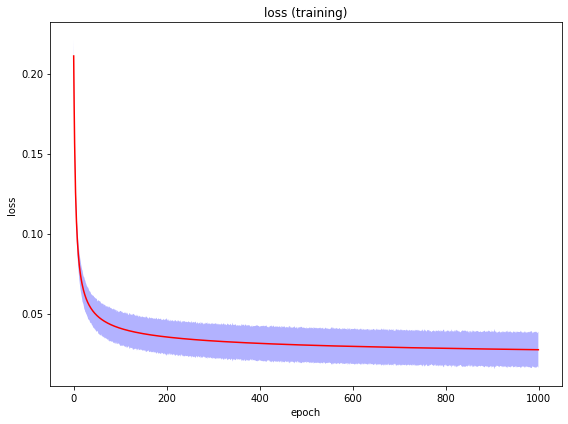

In [224]:
plot_curve_error(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 100, weight decay = 0

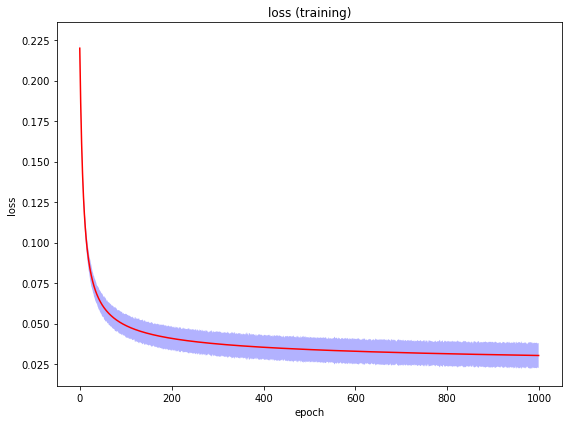

In [225]:
plot_curve_error(train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'epoch', 'loss', 'loss (training)')

## loss (training) curve : mini-batch size = 200, weight decay = 0

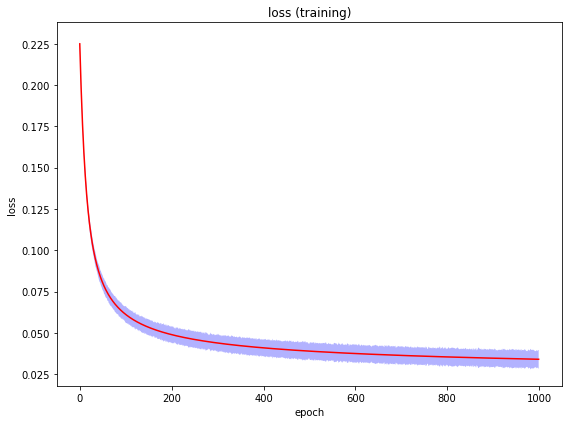

In [226]:

plot_curve_error(train_loss_mean_minibatch[2], train_loss_std_minibatch[2], 'epoch', 'loss', 'loss (training)')

## accuracy (training) curve : mini-batch size = 50, weight decay = 0

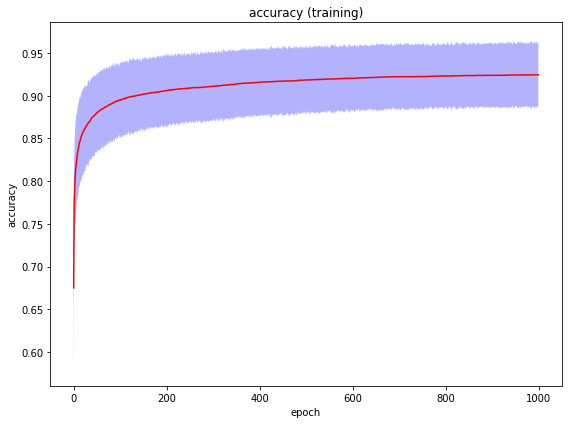

In [227]:
plot_curve_error(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 100, weight decay = 0

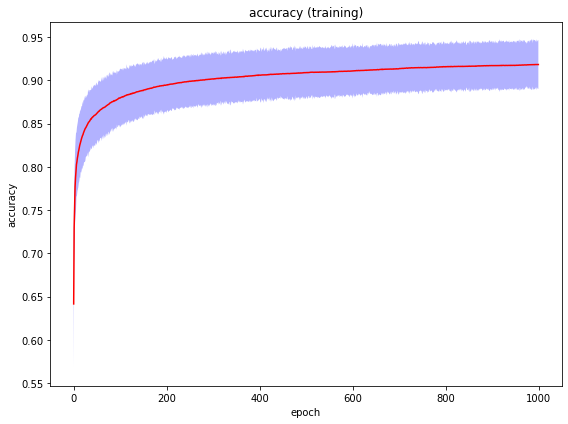

In [228]:
plot_curve_error(train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'epoch', 'accuracy', 'accuracy (training)')

## accuracy (training) curve : mini-batch size = 200, weight decay = 0

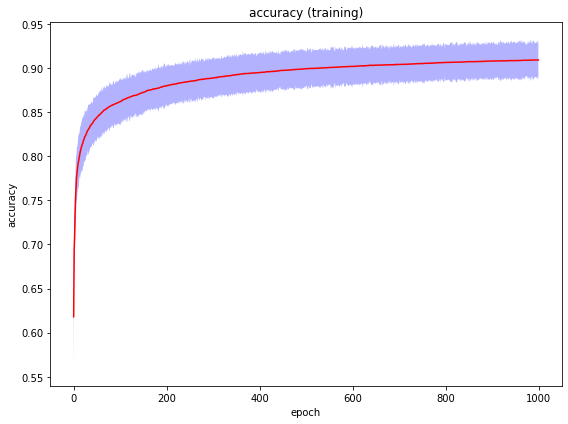

In [229]:
plot_curve_error(train_accuracy_mean_minibatch[2], train_accuracy_std_minibatch[2], 'epoch', 'accuracy', 'accuracy (training)')

## loss (testing) curve with different mini-batch

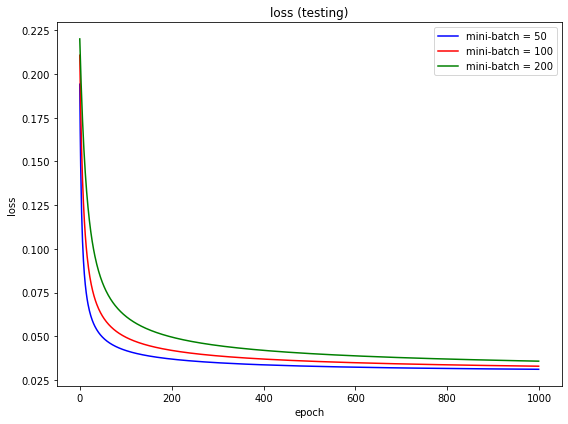

In [230]:
plot_curve3(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', test_loss_minibatch[2], 'mini-batch = 200', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different mini-batch

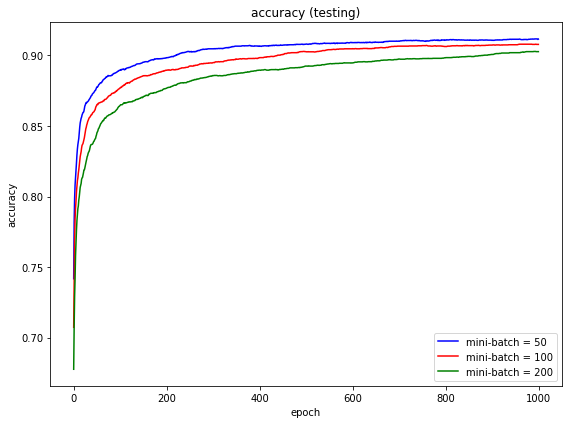

In [231]:
plot_curve3(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', test_accuracy_minibatch[2], 'mini-batch = 200', 'epoch', 'accuracy', 'accuracy (testing)')

## loss (testing) curve with different weight-decay

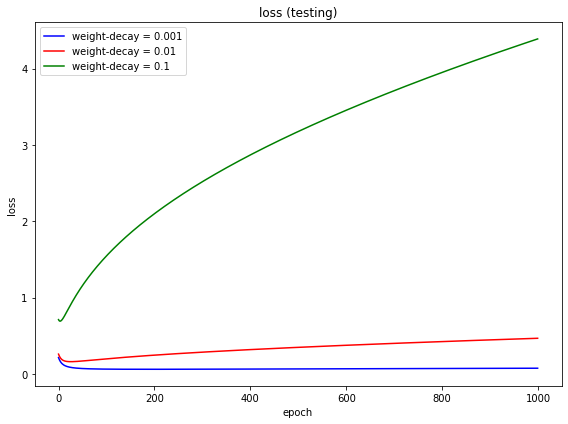

In [232]:
plot_curve3(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', test_loss_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'loss', 'loss (testing)')

## accuracy (testing) curve with different weight-decay

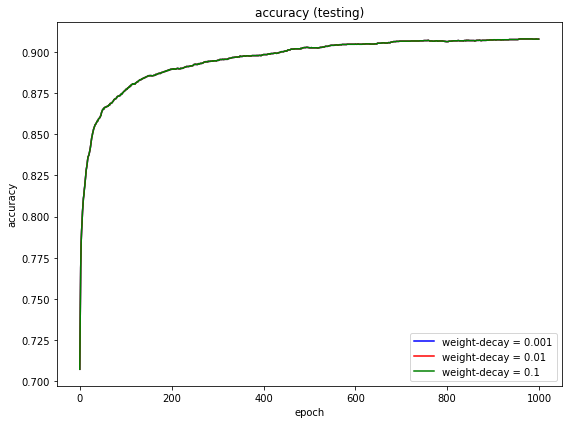

In [233]:
plot_curve3(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', test_accuracy_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'accuracy', 'accuracy (testing)')

## print values

In [234]:
def print_curve(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

## given iterations at which the values are presented

In [235]:
index = np.array([0, 100, 200, 300, 400, 500, 600, 700, 800, 900])

## training loss (mean) : mini-batch = 50, weight-decay = 0

In [236]:
print_curve(train_loss_mean_minibatch[0], index)

index =    0, value = 0.2109517433
index =  100, value = 0.0408311274
index =  200, value = 0.0353653280
index =  300, value = 0.0328934512
index =  400, value = 0.0313681419
index =  500, value = 0.0302918243
index =  600, value = 0.0294718832
index =  700, value = 0.0288161945
index =  800, value = 0.0282734200
index =  900, value = 0.0278118670


## training loss (mean) : mini-batch = 100, weight-decay = 0

In [237]:
print_curve(train_loss_mean_minibatch[1], index)

index =    0, value = 0.2200386677
index =  100, value = 0.0488445228
index =  200, value = 0.0408630376
index =  300, value = 0.0374310204
index =  400, value = 0.0353816911
index =  500, value = 0.0339665661
index =  600, value = 0.0329049404
index =  700, value = 0.0320657924
index =  800, value = 0.0313780176
index =  900, value = 0.0307984580


## training loss (mean) : mini-batch = 200, weight-decay = 0

In [238]:
print_curve(train_loss_mean_minibatch[2], index)

index =    0, value = 0.2249653629
index =  100, value = 0.0611134371
index =  200, value = 0.0488844562
index =  300, value = 0.0438170481
index =  400, value = 0.0408792072
index =  500, value = 0.0388982137
index =  600, value = 0.0374411776
index =  700, value = 0.0363072820
index =  800, value = 0.0353896149
index =  900, value = 0.0346246614


## training accuracy (mean) : mini-batch = 50, weight-decay = 0 

In [239]:
print_curve(train_accuracy_mean_minibatch[0], index)

index =    0, value = 0.6751000000
index =  100, value = 0.8951500000
index =  200, value = 0.9062000000
index =  300, value = 0.9112000000
index =  400, value = 0.9160000000
index =  500, value = 0.9184000000
index =  600, value = 0.9204000000
index =  700, value = 0.9224000000
index =  800, value = 0.9230000000
index =  900, value = 0.9238500000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0

In [240]:
print_curve(train_accuracy_mean_minibatch[1], index)

index =    0, value = 0.6415000000
index =  100, value = 0.8798500000
index =  200, value = 0.8948000000
index =  300, value = 0.9018000000
index =  400, value = 0.9062000000
index =  500, value = 0.9090500000
index =  600, value = 0.9109500000
index =  700, value = 0.9137000000
index =  800, value = 0.9158000000
index =  900, value = 0.9171500000


## training accuracy (mean) : mini-batch = 200, weight-decay = 0

In [241]:
print_curve(train_accuracy_mean_minibatch[2], index)

index =    0, value = 0.6180500000
index =  100, value = 0.8617500000
index =  200, value = 0.8798500000
index =  300, value = 0.8886000000
index =  400, value = 0.8947000000
index =  500, value = 0.8989500000
index =  600, value = 0.9015500000
index =  700, value = 0.9039000000
index =  800, value = 0.9062000000
index =  900, value = 0.9078000000


## training loss (mean) : mini-batch = 100, weight-decay = 0.001

In [242]:
print_curve(train_loss_mean_weight_decay[0], index)

index =    0, value = 0.2250493173
index =  100, value = 0.0637902711
index =  200, value = 0.0614202495
index =  300, value = 0.0622155444
index =  400, value = 0.0636909491
index =  500, value = 0.0653650952
index =  600, value = 0.0670936869
index =  700, value = 0.0688244002
index =  800, value = 0.0705351051
index =  900, value = 0.0722175627


## training loss (mean) : mini-batch = 100, weight-decay = 0.01

In [243]:
print_curve(train_loss_mean_weight_decay[1], index)

index =    0, value = 0.2701451635
index =  100, value = 0.1983020056
index =  200, value = 0.2464351563
index =  300, value = 0.2852762600
index =  400, value = 0.3184742710
index =  500, value = 0.3479518567
index =  600, value = 0.3747924048
index =  700, value = 0.3996518703
index =  800, value = 0.4229488933
index =  900, value = 0.4449895054


## training loss (mean) : mini-batch = 100, weight-decay = 0.1

In [244]:
print_curve(train_loss_mean_weight_decay[2], index)

index =    0, value = 0.7211036255
index =  100, value = 1.5434193509
index =  200, value = 2.0965842241
index =  300, value = 2.5158834169
index =  400, value = 2.8663074895
index =  500, value = 3.1738194719
index =  600, value = 3.4517795839
index =  700, value = 3.7079265714
index =  800, value = 3.9470867746
index =  900, value = 4.1727089322


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.001

In [245]:
print_curve(train_accuracy_mean_weight_decay[0], index)

index =    0, value = 0.6415000000
index =  100, value = 0.8798500000
index =  200, value = 0.8948000000
index =  300, value = 0.9018000000
index =  400, value = 0.9062000000
index =  500, value = 0.9090500000
index =  600, value = 0.9109500000
index =  700, value = 0.9137000000
index =  800, value = 0.9158000000
index =  900, value = 0.9171500000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.01

In [246]:
print_curve(train_accuracy_mean_weight_decay[1], index)

index =    0, value = 0.6415000000
index =  100, value = 0.8798500000
index =  200, value = 0.8948000000
index =  300, value = 0.9018000000
index =  400, value = 0.9062000000
index =  500, value = 0.9090500000
index =  600, value = 0.9109500000
index =  700, value = 0.9137000000
index =  800, value = 0.9158000000
index =  900, value = 0.9171500000


## training accuracy (mean) : mini-batch = 100, weight-decay = 0.1

In [247]:
print_curve(train_accuracy_mean_weight_decay[2], index)

index =    0, value = 0.6415000000
index =  100, value = 0.8798500000
index =  200, value = 0.8948000000
index =  300, value = 0.9018000000
index =  400, value = 0.9062000000
index =  500, value = 0.9090500000
index =  600, value = 0.9109500000
index =  700, value = 0.9137000000
index =  800, value = 0.9158000000
index =  900, value = 0.9171500000


## function definition for presenting the results

In [248]:
def function_results_01(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [249]:
def function_results_02(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [250]:
def function_results_03(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [251]:
def function_results_04(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [252]:
def function_results_05(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [253]:
def function_results_06(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [254]:
def function_results_07(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [255]:
def function_results_08(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [256]:
def function_results_09(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [257]:
def function_results_10(data, index_data, nRow, nCol):
    fig, axes = plt.subplots(nRow, nCol, constrained_layout=True, figsize=(nCol * 3, nRow * 3))

    for i in range(nRow):
        for j in range(nCol):

            k       = i * nCol + j
            index   = index_data[k]

            axes[i, j].imshow(data[index], cmap='gray', vmin=0, vmax=1)
            axes[i, j].xaxis.set_visible(False)
            axes[i, j].yaxis.set_visible(False)

    plt.show()

In [258]:
def function_results_11(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [259]:
def function_results_12(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [260]:
def function_results_13(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [261]:
def function_results_14(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [262]:
def function_results_15(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [263]:
def function_results_16(data_mean, data_std, x_label, y_label, title):

    plt.figure(figsize=(8, 6))
    plt.title(title)

    alpha = 0.3
    
    plt.plot(range(len(data_mean)), data_mean, '-', color = 'red')
    plt.fill_between(range(len(data_mean)), data_mean - data_std, data_mean + data_std, facecolor = 'blue', alpha = alpha) 
    
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.tight_layout()
    plt.show()

In [264]:
def function_results_17(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
    plt.plot(range(len(data3)), data3, '-', color = 'green', label = label_data3)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [265]:
def function_results_18(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
    plt.plot(range(len(data3)), data3, '-', color = 'green', label = label_data3)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [266]:
def function_results_19(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
    plt.plot(range(len(data3)), data3, '-', color = 'green', label = label_data3)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [267]:
def function_results_20(data1, label_data1, data2, label_data2, data3, label_data3, x_label, y_label, title):
    
    plt.figure(figsize=(8, 6))
    plt.title(title)

    plt.plot(range(len(data1)), data1, '-', color = 'blue', label = label_data1)
    plt.plot(range(len(data2)), data2, '-', color = 'red', label = label_data2)
    plt.plot(range(len(data3)), data3, '-', color = 'green', label = label_data3)
     
    plt.xlabel(x_label)
    plt.ylabel(y_label)

    plt.legend()
    plt.tight_layout()
    plt.show()

In [268]:
def function_results_21(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

In [269]:
def function_results_22(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

In [270]:
def function_results_23(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

In [271]:
def function_results_24(data, index):

    for i in range(len(index)):

        idx = index[i]
        val = data[idx]

        print('index = %4d, value = %12.10f' % (idx, val))

---

# RESULTS

---

## # 01. plot the input images for '0'

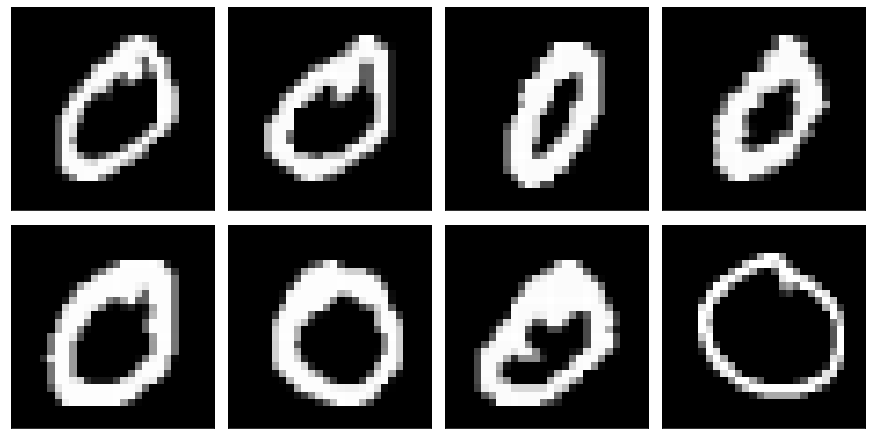

In [272]:
function_results_01(x_train, index_train[0][0][0:nPlot], nRow, nCol)

## # 02. plot the input images for '1'

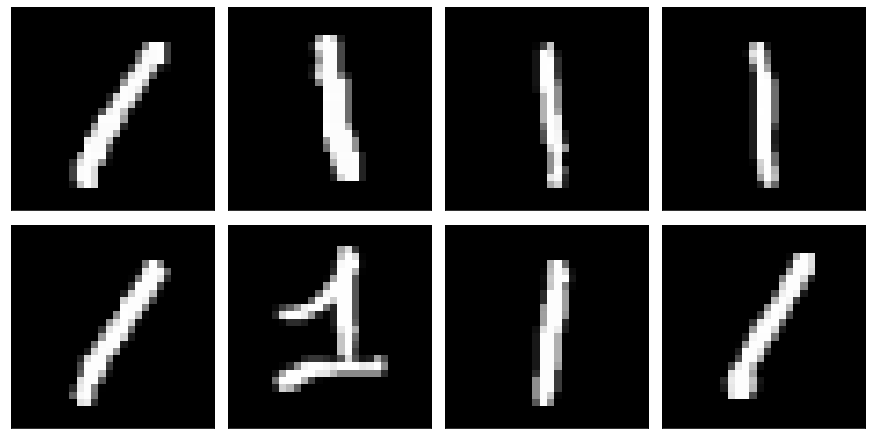

In [273]:
function_results_02(x_train, index_train[1][0][0:nPlot], nRow, nCol)

## # 03. plot the input images for '2'

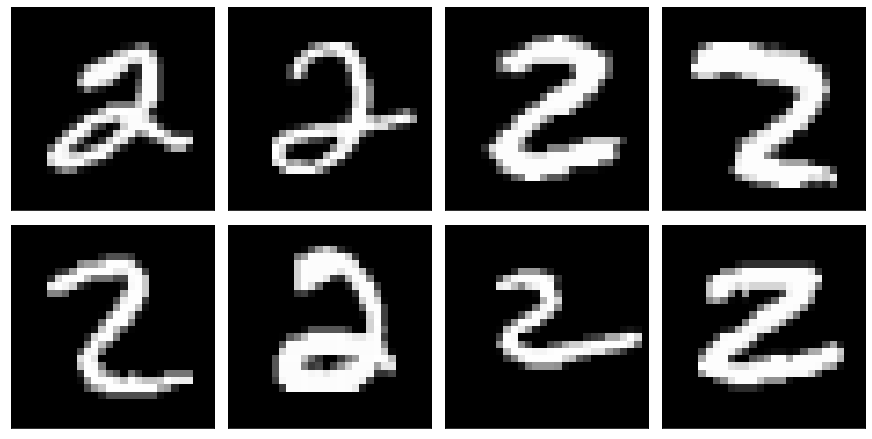

In [274]:
function_results_03(x_train, index_train[2][0][0:nPlot], nRow, nCol)

## # 04. plot the input images for '3'

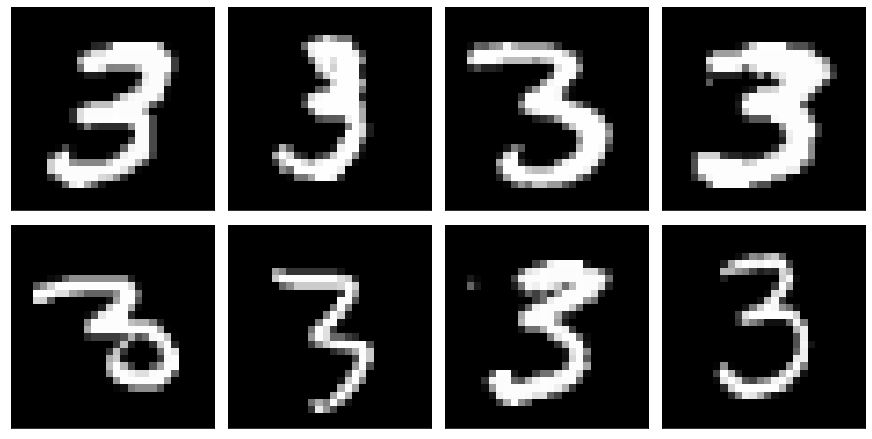

In [275]:
function_results_04(x_train, index_train[3][0][0:nPlot], nRow, nCol)

## # 05. plot the input images for '4'

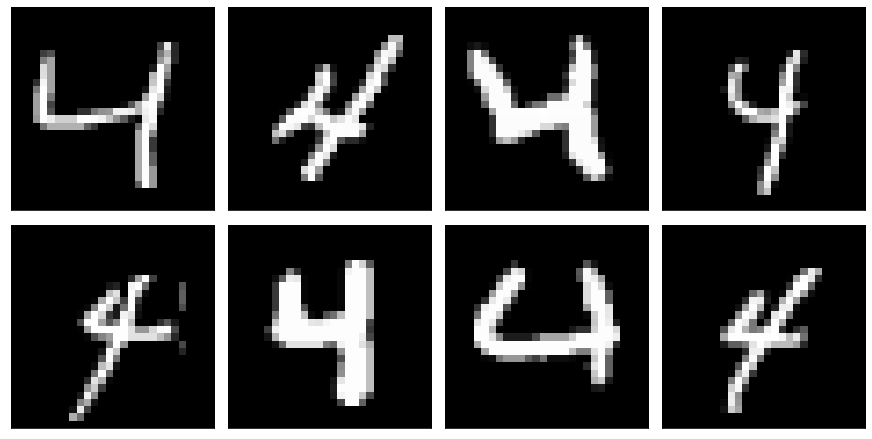

In [276]:
function_results_05(x_train, index_train[4][0][0:nPlot], nRow, nCol)

## # 06. plot the input images for '5'

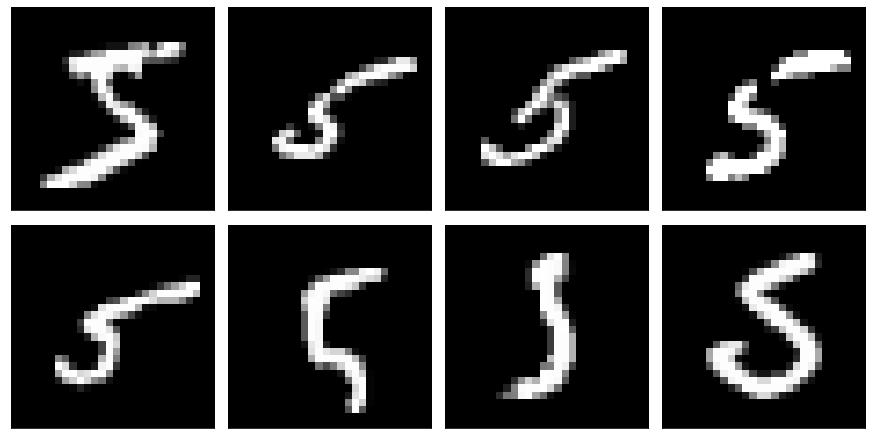

In [277]:
function_results_06(x_train, index_train[5][0][0:nPlot], nRow, nCol)

## # 07. plot the input images for '6'

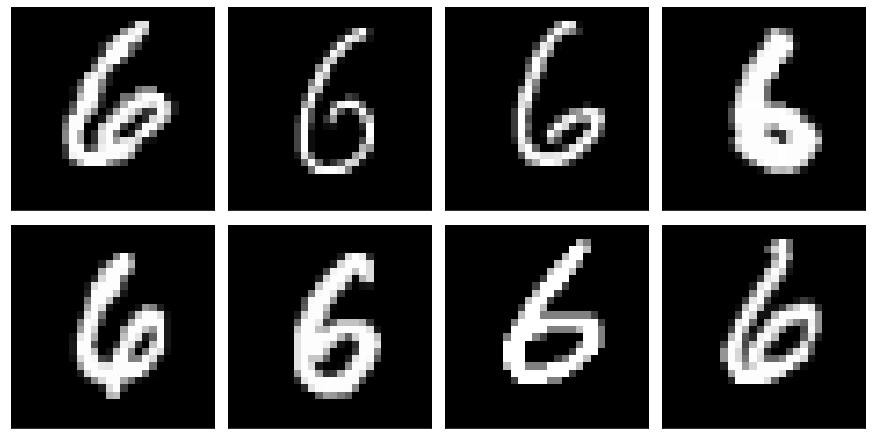

In [278]:
function_results_07(x_train, index_train[6][0][0:nPlot], nRow, nCol)

## # 08. plot the input images for '7'

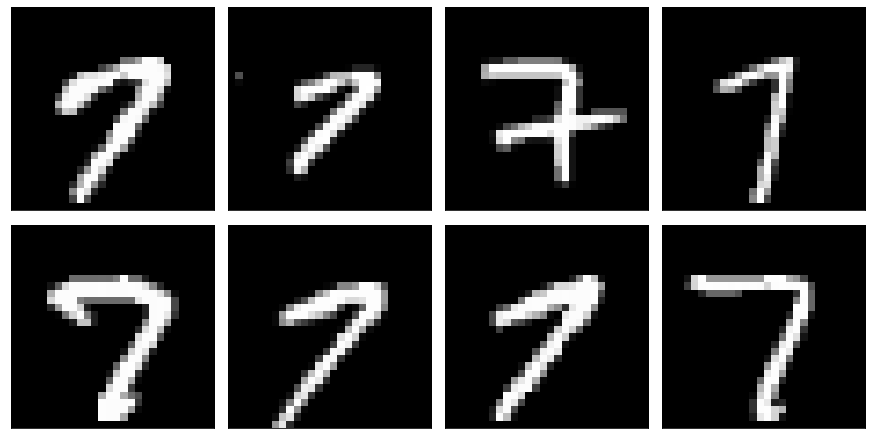

In [279]:
function_results_08(x_train, index_train[7][0][0:nPlot], nRow, nCol)

## # 09. plot the input images for '8'

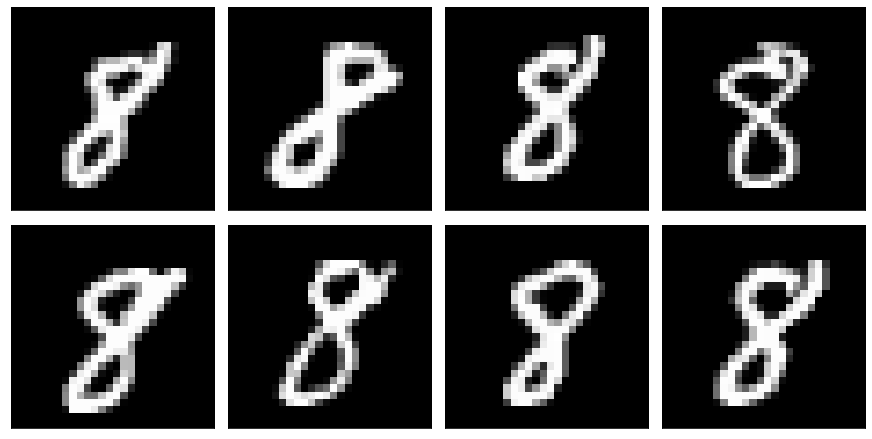

In [280]:
function_results_09(x_train, index_train[8][0][0:nPlot], nRow, nCol)

## # 10. plot the input images for '9'

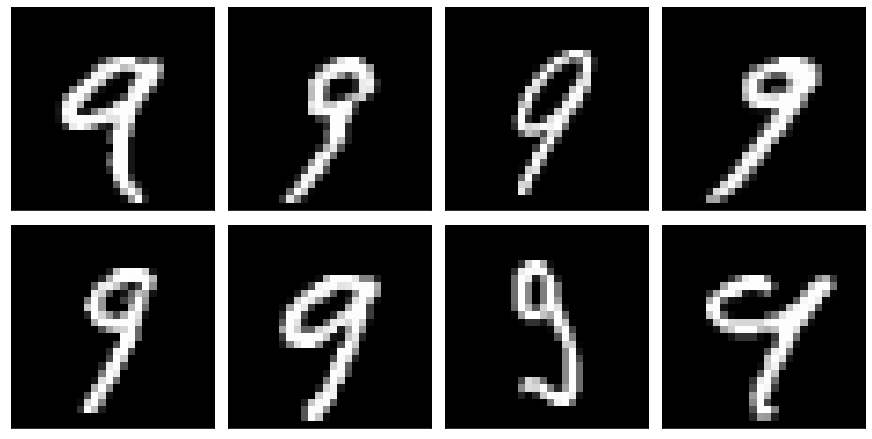

In [281]:
function_results_10(x_train, index_train[9][0][0:nPlot], nRow, nCol)

## # 11. plot loss (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

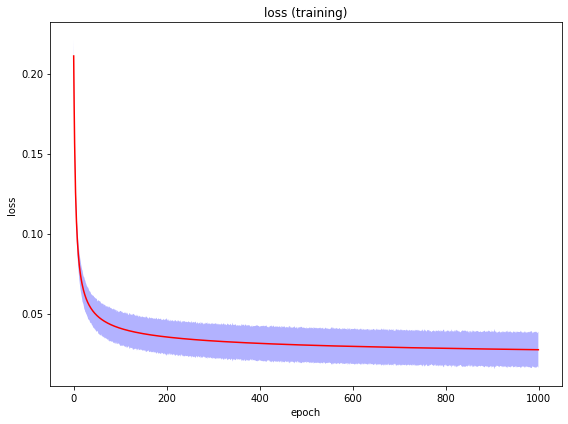

In [282]:
function_results_11(train_loss_mean_minibatch[0], train_loss_std_minibatch[0], 'epoch', 'loss', 'loss (training)')

## # 12. plot loss (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

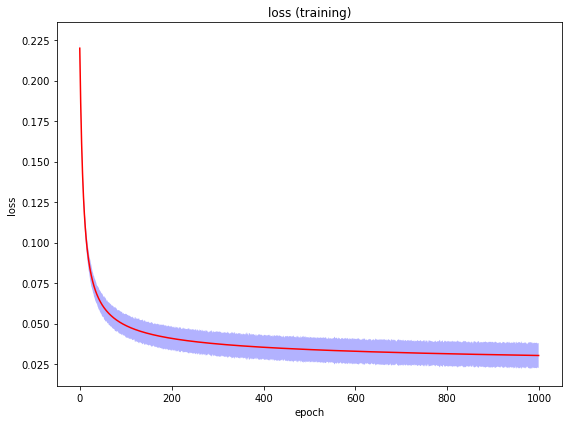

In [283]:
function_results_12(train_loss_mean_minibatch[1], train_loss_std_minibatch[1], 'epoch', 'loss', 'loss (training)')

## # 13. plot loss (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

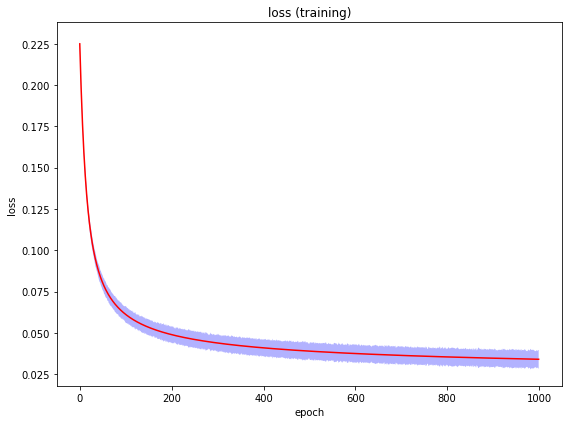

In [284]:
function_results_13(train_loss_mean_minibatch[2], train_loss_std_minibatch[2], 'epoch', 'loss', 'loss (training)')

## # 14. plot accuracy (training) curve (mean, std) : mini-batch size = 50, weight decay = 0

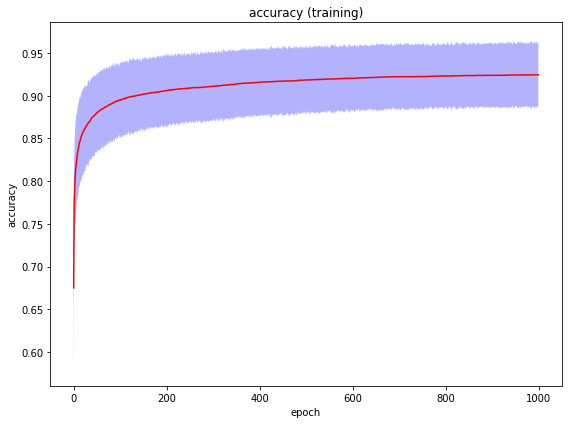

In [285]:
function_results_14(train_accuracy_mean_minibatch[0], train_accuracy_std_minibatch[0], 'epoch', 'accuracy', 'accuracy (training)')

## # 15. plot accuracy (training) curve (mean, std) : mini-batch size = 100, weight decay = 0

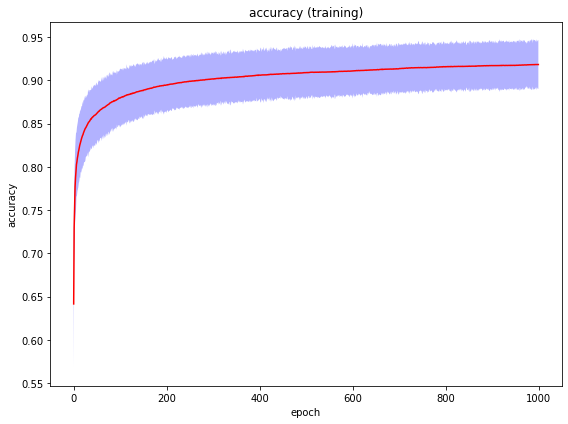

In [286]:
function_results_15(train_accuracy_mean_minibatch[1], train_accuracy_std_minibatch[1], 'epoch', 'accuracy', 'accuracy (training)')

## # 16. plot accuracy (training) curve (mean, std) : mini-batch size = 200, weight decay = 0

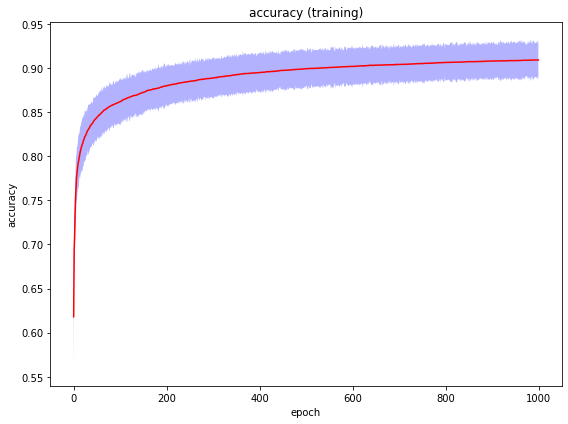

In [287]:
function_results_16(train_accuracy_mean_minibatch[2], train_accuracy_std_minibatch[2], 'epoch', 'accuracy', 'accuracy (training)')

## # 17. plot loss (testing) curve (mean) with different mini-batch

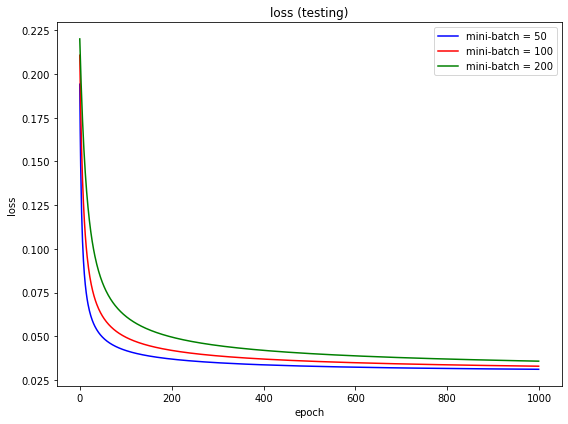

In [288]:
function_results_17(test_loss_minibatch[0], 'mini-batch = 50', test_loss_minibatch[1], 'mini-batch = 100', test_loss_minibatch[2], 'mini-batch = 200', 'epoch', 'loss', 'loss (testing)')

## # 18. plot accuracy (testing) curve (mean) with different mini-batch

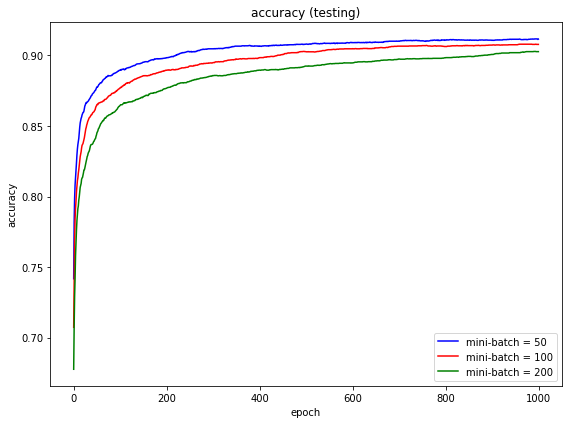

In [289]:
function_results_18(test_accuracy_minibatch[0], 'mini-batch = 50', test_accuracy_minibatch[1], 'mini-batch = 100', test_accuracy_minibatch[2], 'mini-batch = 200', 'epoch', 'accuracy', 'accuracy (testing)')

## # 19. plot loss (testing) curve (mean) with different weight-decay

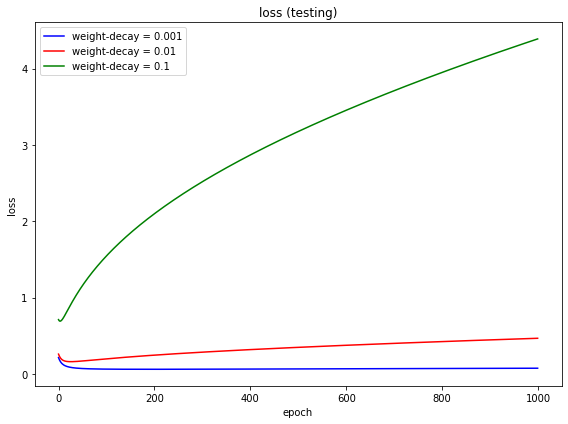

In [290]:
function_results_19(test_loss_weight_decay[0], 'weight-decay = 0.001', test_loss_weight_decay[1], 'weight-decay = 0.01', test_loss_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'loss', 'loss (testing)')

## # 20. plot accuracy (testing) curve (mean) with different weight-decay

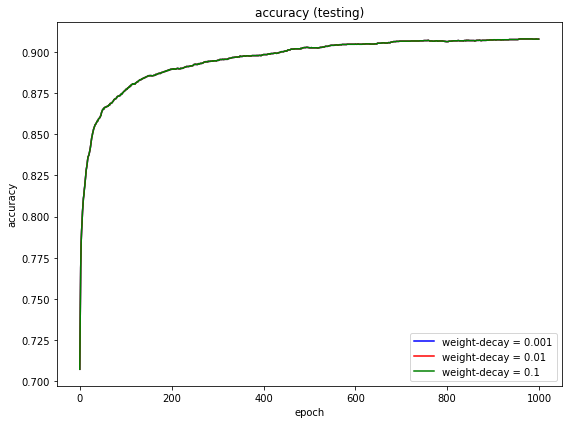

In [291]:
function_results_20(test_accuracy_weight_decay[0], 'weight-decay = 0.001', test_accuracy_weight_decay[1], 'weight-decay = 0.01', test_accuracy_weight_decay[2], 'weight-decay = 0.1', 'epoch', 'accuracy', 'accuracy (testing)')

## # 21. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [292]:
function_results_21(train_loss_mean_minibatch[1], index)

index =    0, value = 0.2200386677
index =  100, value = 0.0488445228
index =  200, value = 0.0408630376
index =  300, value = 0.0374310204
index =  400, value = 0.0353816911
index =  500, value = 0.0339665661
index =  600, value = 0.0329049404
index =  700, value = 0.0320657924
index =  800, value = 0.0313780176
index =  900, value = 0.0307984580


## # 22. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0

In [293]:
function_results_22(train_accuracy_mean_minibatch[1], index)

index =    0, value = 0.6415000000
index =  100, value = 0.8798500000
index =  200, value = 0.8948000000
index =  300, value = 0.9018000000
index =  400, value = 0.9062000000
index =  500, value = 0.9090500000
index =  600, value = 0.9109500000
index =  700, value = 0.9137000000
index =  800, value = 0.9158000000
index =  900, value = 0.9171500000


## # 23. print training loss (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [294]:
function_results_23(train_loss_mean_weight_decay[0], index)

index =    0, value = 0.2250493173
index =  100, value = 0.0637902711
index =  200, value = 0.0614202495
index =  300, value = 0.0622155444
index =  400, value = 0.0636909491
index =  500, value = 0.0653650952
index =  600, value = 0.0670936869
index =  700, value = 0.0688244002
index =  800, value = 0.0705351051
index =  900, value = 0.0722175627


## # 24. print training accuracy (mean) at iterations 0, 100, 200, 300, 400, 500, 600, 700, 800, 900 : mini-batch = 100, weight-decay = 0.001

In [295]:
function_results_24(train_accuracy_mean_weight_decay[0], index)

index =    0, value = 0.6415000000
index =  100, value = 0.8798500000
index =  200, value = 0.8948000000
index =  300, value = 0.9018000000
index =  400, value = 0.9062000000
index =  500, value = 0.9090500000
index =  600, value = 0.9109500000
index =  700, value = 0.9137000000
index =  800, value = 0.9158000000
index =  900, value = 0.9171500000
